In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_city = pd.read_csv("raw_data/city_data.csv")
df_ride = pd.read_csv("raw_data/ride_data.csv")

In [3]:
df_city.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [4]:
df_ride.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [5]:
df_pyber = df_ride.set_index("city").join(df_city[['city','type','driver_count']].set_index("city"),how="inner")
df_pyber = df_pyber.reset_index(drop=False)
df_pyber.head()

,city,date,fare,ride_id,type,driver_count
0,Alvarezhaven,2016-04-18 20:51:29,31.93,4267015736324,Urban,21
1,Alvarezhaven,2016-08-01 00:39:48,6.42,8394540350728,Urban,21
2,Alvarezhaven,2016-09-01 22:57:12,18.09,1197329964911,Urban,21
3,Alvarezhaven,2016-08-18 07:12:06,20.74,357421158941,Urban,21
4,Alvarezhaven,2016-04-04 23:45:50,14.25,6431434271355,Urban,21


In [6]:
average_fare = df_pyber.groupby("city").mean()['fare']
#print(average_fare)
average_fare = pd.DataFrame(average_fare)

total_drivers = df_pyber.groupby("city").mean()['driver_count']
#print(total_drivers) 
total_drivers = pd.DataFrame(total_drivers)

total_rides = df_pyber.groupby("city").count()["ride_id"]
#print(total_rides)
total_rides = pd.DataFrame(total_rides).rename(columns={"ride_id":"total rides"})

city_type = df_pyber.groupby(['city','type']).count().reset_index(drop=False)[["city","type"]].set_index("city")

df_summary = ((average_fare.join(total_drivers)).join(total_rides)).join(city_type)

df_summary.head()

,fare,driver_count,total rides,type
city,,,,
Alvarezhaven,23.928710,21.0,31,Urban
Alyssaberg,20.609615,67.0,26,Urban
Anitamouth,37.315556,16.0,9,Suburban
Antoniomouth,23.625000,21.0,22,Urban
Aprilchester,21.981579,49.0,19,Urban


#### Try a plot with the following
Average Fare ($) Per City  - y axis  
Total Number of Rides Per City  - x axis  
Total Number of Drivers Per City  - bubble size  
City Type (Urban, Suburban, Rural)  - bubble color  

In [25]:
df_summary['color'] = df_summary['type'].replace("Urban",'r',regex=True).replace("Suburban",'b',regex=True).replace("Rural",'g',regex=True)

(0, 40)

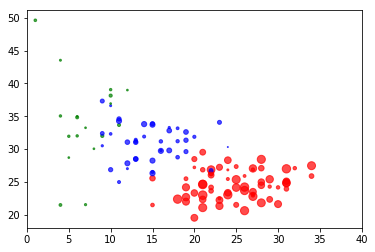

In [28]:
plt.scatter(df_summary['total rides'],df_summary['fare'],s=df_summary['driver_count'],c=df_summary['color'],alpha=0.7)
plt.xlim(0,40)

### Pie Chart 1
% of Total Rides by City Type

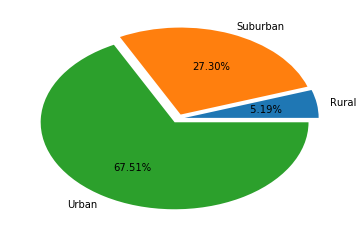

In [66]:
percent_total_rides = list(df_summary.reset_index().groupby('type').sum()['total rides']/df_summary.reset_index().groupby('type').sum()['total rides'].sum()*100)
type_labels = list(df_summary.reset_index().groupby('type').sum()['total rides'].index)
plt.pie(percent_total_rides,labels=type_labels,explode=[0.05,0.05,0.05],autopct='{:5.2f}%'.format)
plt.show()

### Pie Chart 2
% of Total Fares by City Type

[]

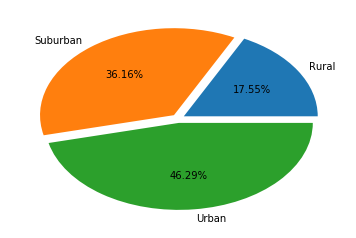

In [68]:
percent_total_fare = list(df_summary.reset_index().groupby('type').sum()['fare']/df_summary.reset_index().groupby('type').sum()['fare'].sum()*100)
type_labels = list(df_summary.reset_index().groupby('type').sum()['fare'].index)
plt.pie(percent_total_fare,labels=type_labels,explode=[0.05,0.05,0.05],autopct='{:5.2f}%'.format)
plt.plot()

### Pie Chart 3
% of Total Drivers by City Type

[]

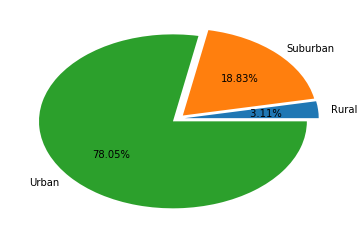

In [70]:
percent_total_fare = list(df_summary.reset_index().groupby('type').sum()['driver_count']/df_summary.reset_index().groupby('type').sum()['driver_count'].sum()*100)
type_labels = list(df_summary.reset_index().groupby('type').sum()['driver_count'].index)
plt.pie(percent_total_fare,labels=type_labels,explode=[0.05,0.05,0.05],autopct='{:5.2f}%'.format)
plt.plot()